In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sympy as sp
import math
import warnings
warnings.filterwarnings(action='ignore')
from functools import reduce

### Maximum likelihood Estimation

모수적인 데이터 밀도 추정 방법 __(MLE)__

파라미터들 $\theta = (\theta 1 + \theta 2 + ..... + \theta n)$ 으로 구성된 

확률 밀도 함수 $P(x|\theta)$ 에서 데이터의 전체 집합을 $x = (x1, x2, ..... ,xn)$ 이라고 할 때,

$x = (x1, x2, ..... ,xn)$ 만으로 $P(x|\theta)$ 와 $\theta = (\theta 1 + \theta 2 + ..... + \theta n)$ 를 추정하는 방법입니다.

최대 우도 계산식은 $L(\mu , \sigma | x) = \frac {1}{\sqrt{2\pi\sigma^2}} \times e^\frac{-(x - \mu)^2}{2\sigma^2}$ 입니다.

즉 우도(likelihood) = 분포가 정해지고, 관측치가 주어졌을 때 모수가 나올 가능성 ! 

다시 말해 optimul 한 $\mu$ 와 $\sigma$ 를 주어진 데이터의 집합으로 찾는 것이지만... 

위의 글과 식을 보고 이해할 수 있는 사람은 극히 소수라 생각하고 예제로 이해해보도록 하겠습니다.

In [2]:
nd = np.random.normal(20, 2, 1000)
nd2 = np.random.normal(15, 2, 1000)
nd3 = np.random.normal(10, 2, 1000)

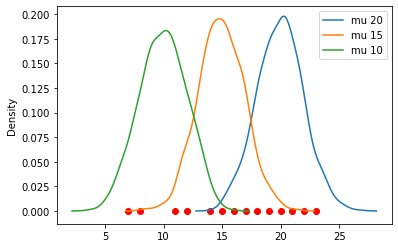

In [3]:
sns.kdeplot(nd, label = 'mu 20');
sns.kdeplot(nd2, label = 'mu 15');
sns.kdeplot(nd3, label = 'mu 10');
x1 = [7,8,11,12,14,15,16,17,18,19,20,21,22,23]
y = np.zeros(14)
plt.scatter(x1, y, color = 'red');
plt.legend();

만약 위와 같은 그림이 있다고 했을 때 빨간 점을을 가장 잘 표현한 분포는 어느 것인지 알 수 있을까요??

저는 그래프만 봤을 땐 주황색과 파란색 분포중 어느 것을 골라야할지 애매한 것 같습니다.

다시 위에 있던 식으로 계산을 하고 시각적으로 확인해보면...

In [4]:
x2 = np.array(x1)

# 계산기...

pi = math.radians(180)

#x = sp.symbols('x') # each data
# w = sp.symbols('w') # mu
# z = sp.symbols('z') # sigma
k = math.e**(-(x2 - 20)**2 / 2 * 2**2)
k2 = math.e**(-(x2 - 15)**2 / 2 * 2**2)
k3 = math.e**(-(x2 - 10)**2 / 2 * 2**2)

def calculateMLE(x2, w, z):
    calculate = k / math.sqrt(2 * pi * z**2)
    return calculate

def calculateMLE2(x2, w, z):
    calculate2 = k2 / math.sqrt(2 * pi * z**2)
    return calculate2

def calculateMLE3(x2, w, z):
    calculate3 = k3 / math.sqrt(2 * pi * z**2)
    return calculate3

In [5]:
arr1 = calculateMLE(x2, 20, 2)
arr2 = calculateMLE2(x2, 15, 2)
arr3 = calculateMLE3(x2, 10, 2)

def multivalue(arr):
    return reduce(lambda x, y: x*y, arr)

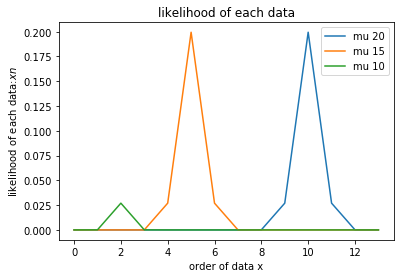

In [6]:
plt.plot(calculateMLE(x2, 20, 2), label = 'mu 20');
plt.plot(calculateMLE2(x2, 15, 2), label = 'mu 15');
plt.plot(calculateMLE3(x2, 10, 2), label = 'mu 10');
plt.title('likelihood of each data');
plt.xlabel('order of data x');
plt.ylabel('likelihood of each data' ':' '$xn$');
plt.legend();

어레이 안에 각각 데이터 x 에 대한 우도값들이 담겨있을 때 곱하지 않고 바로 시각화한 경우

각 데이터마다 계산에 대한 결과값은 데이터가 x 일 때 각 mu 와 sigma 에 대한 곡선에 대응하는 likelihood (우도값) 입니다.

우도값이 작으면 작을 수록 해당 데이터 x 가 어떤 정규 분포의 평균쪽에 가까워 졌다라는 것을 의미합니다. ★

각 우도값들을 모두 곱하진 않았지만 이미 초록색(평균이 10 인 분포)은 out 입니다. -> 설명력 부족

하지만 주황색과 파란색 분포 중 최적의 분포(파라미터)를 찾기 위해서는 우도값을 최종적으로 계산해봐야 알 수 있을 것 같습니다.

In [7]:
arr1 = calculateMLE(x2, 20, 2)
arr2 = calculateMLE2(x2, 15, 2)
arr3 = calculateMLE3(x2, 10, 2)

def multivalue(arr):
# reduce 의 역할은 [1,2,3,4,5] 가 있을 때 연산하면 1, (1*2), (1*2)*3, (1*2*3)*4 이렇게 요소를 줄여서 계산
    return reduce(lambda x, y: x*y, arr) 

In [8]:
multivalue(arr1), multivalue(arr2), multivalue(arr3)

(0.0, 1.872002380073649e-308, 0.0)

In [9]:
multivalue(arr2) > multivalue(arr3) # arr2 (15,2), arr1 (20, 2)

True

In [10]:
multivalue(arr2) > multivalue(arr1)

True

위에 곱한 내용을 정리해보면,

$L(\mu,\sigma|x1,x2,x3,x4,....xn) = L(\mu, \sigma |x1) \times L(\mu, \sigma | x2) \times .......\times L(\mu, \sigma | xn)$

위와 같이 표현할 수 있습니다.

계산해본 결과 평균이 20 과 15 인 분포 중 평균이 20 인 분포의 우도값이 더 낮기 때문에,

각 데이터들이 잘 설명될 수 있는 __분포는 $\mu$ = 15, $\sigma$ = 2 인 분포__ 입니다.

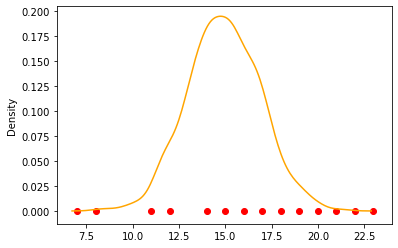

In [11]:
sns.kdeplot(nd2, color = 'orange');
plt.scatter(x1, y, color = 'red');

데이터 x 가 n 개가 아닌 1 개라면 그냥 계산한 결과값을 보면 될 것 같습니다.

### in-depth

$L(\mu,\sigma|x1,x2,x3,x4,....xn) = L(\mu, \sigma |x1) \times L(\mu, \sigma | x2) \times .......\times L(\mu, \sigma | xn)$ 이 식에서

우리는 $\mu$ 와 $\sigma$ 대한 편미분으로 각 도함수가 0 이 되는 $\mu$ 값과 $\sigma$ 의 값을 찾아 각 최대 우도 추정치들을 찾을 수 있습니다

그러기 위해선 양변에 밑이 e인 로그를 씌워 계산을 쉽게 합니다. 

그리고 로그의 성질을 활용하여 식을 정리해줘야 합니다.

$ln(L(\mu,\sigma|x1,x2,x3,x4,....xn)) = ln(L(\mu, \sigma |x1) \times L(\mu, \sigma | x2) \times .......\times L(\mu, \sigma | xn))$

그리고 우변에서 곱셈 부분을 모두 덧셈으로 바꿔주고.. ( 로그의 성질 )

$ln(L(\mu, \sigma |x1) + ln(L(\mu, \sigma | x2)) + ....... + ln(L(\mu, \sigma | xn)))$

맨 앞의 부분만 식을 정리해보겠습니다....

$L(\mu , \sigma | x1) = \frac {1}{\sqrt{2\pi\sigma^2}}\times e^\frac{-(x1 - \mu)^2}{2\sigma^2}$ 였으니까,  $ln(L(\mu , \sigma | x1)) = ln(\frac {1}{\sqrt{2\pi\sigma^2}}\times e^\frac{-(x1 - \mu)^2}{2\sigma^2})$

$ln(\frac {1}{\sqrt{2\pi\sigma^2}}) + ln(e^\frac{-(x1 - \mu)^2}{2\sigma^2})$ 그리고 $ln(\frac {1}{\sqrt{2\pi\sigma^2}})$ 이면 $ln[(2\pi \sigma^2)^\frac{-1}{2}]$ 이고, $ln(e^\frac{-(x1 - \mu)^2}{2\sigma^2})$ 이면 $\frac{-(x1 - \mu)^2}{2\sigma^2} \times ln(e)$ 이다.

위 식을 정리하면 $\frac{-1}{2} \times ln(2\pi \sigma^2) - \frac{-(x1 - \mu)^2}{2\sigma^2}$ 이고, $\frac{-1}{2} \times ln(2\pi \sigma^2)$ 은 $-\frac{1}{2}ln(2\pi)-\frac{1}{2}ln(\sigma^2)$ 그리고 $-\frac{1}{2}ln(\sigma^2)$ 은 $-\frac{2}{2}ln(\sigma)$

그래서 최종적으로 정리하면, 

$-\frac{1}{2}ln(2\pi)-ln(\sigma)-\frac{(x1 - \mu)^2}{2\sigma^2}$ 입니다....

그러면 맨 처음 $L(\mu,\sigma|x1,x2,x3,x4,....xn)$ 은 덧셈으로 표현할 수 있고

$-\frac{1}{2}ln(2\pi)-ln(\sigma)-\frac{(x1 - \mu)^2}{2\sigma^2} + ... + -\frac{1}{2}ln(2\pi)-ln(\sigma)-\frac{(xn - \mu)^2}{2\sigma^2}$ 입니다.

위의 식에서 $-\frac{1}{2}ln(2\pi)$ 와 $ln(\sigma)$ 는 총 n 개가 있고, 마지막항은 x1 부터 xn까지 있으니까 식으로 표현해보면 다음과 같습니다.

$-\frac{n}{2}ln(2\pi) -nln(\sigma) - (\frac{(x1-\mu)^2}{2\sigma^2}+...+\frac{(xn-\mu)^2}{2\sigma^2})$

위의 식에 각 $\sigma$ 와 $\mu$ 에 대해 편미분하여 기울기가 0인 파라미터를 찾아 데이터x 에 대한 최적의 분포를 찾아낼 수 있는 것입니다.

1. $\mu$ 에 대해 편미분

$\frac{\partial}{\partial \mu}ln(L(\mu,\sigma|x1,x2,x3,x4,....xn)) = \frac{\partial}{\partial \mu}(-\frac{n}{2}ln(2\pi) -n \times ln(\sigma) - (\frac{(x1-\mu)^2}{2\sigma^2}+...+\frac{(xn-\mu)^2}{2\sigma^2}))$ 을 계산해보면

0 - 0 + $\frac{1}{\sigma^2}[(x1 + ... + xn) - n\mu]$ (x1 ~ xn 부분은 chain rule 을 써서 계산해야 합니다.)

2. $\sigma$ 에 대해 편미분

$0 - \frac{n}{\sigma} + \frac{(x1 - \mu)^2}{\sigma^3} + ... + \frac{(xn - \mu)^2}{\sigma^3}$ 쓱싹 정리해보면,

$-\frac{n}{\sigma} + \frac{1}{\sigma^3}[(x1 - \mu)^2 + ... + \frac{1}{\sigma^3}[(xn - \mu)^2]$ 입니다. 휴

그리고 각 0으로 만드는 값들을 구해보면..

1. $\frac{1}{\sigma^2}[(x1 + ... + xn) - n\mu] = 0$ 양 변에 $\sigma^2$ 을 곱해주고 $-n\mu$ 를 우변으로 넘긴 후 n으로 나누어주면

$\mu = \frac{(x1 + .... + xn)}{n}$ 이나오고 즉 측정값들의 평균(mean)이 나옵니다.

2. 마찬가지로 $-\frac{n}{\sigma} + \frac{1}{\sigma^3}[(x1 - \mu)^2 + ... + \frac{1}{\sigma^3}[(xn - \mu)^2]$ 도 같은 작업을 해주면

$-\frac{n}{\sigma} + \frac{1}{\sigma^3}[(x1 - \mu)^2 + ... + [(xn - \mu)^2] = 0$ 에서 양변에 $\sigma$ 를 곱해주고 -n 을 이항


$\frac{1}{\sigma^2}[(x1 - \mu)^2 + ... +[(xn - \mu)^2] = n$ 이고, $\sigma^2 = \frac{(x1 - \mu)^2 + ... +(xn - \mu)^2}{n}$ 이다.

최종적으로 $\sigma = \sqrt \frac{(x1 - \mu)^2 + ... +(xn - \mu)^2}{n}$ 즉 $\sigma$ 에 대한 maximum likelihood 는 측정값의 표준 편차입니다.(std)

화이팅입니다. 저두 이번꺼 쓰면서 많이 배웠습니다. 저 라텍스 수학기호 때문에 머리가...

덕분에 라텍스 수학기호 쓰는 법 마스터하고 MLE 파트도 기억에 오래 남을 것 같습니다. 

꾸준히 공부할게요. 감사합니다 sq.